## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import uniform

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.naive_bayes import GaussianNB

In [40]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### *Exploratory Data Analysis*

(array([10510., 16955., 38526., 38550., 40243., 10145., 17161., 38951.,
        40779., 32987.]),
 array([     0. ,  17279.2,  34558.4,  51837.6,  69116.8,  86396. ,
        103675.2, 120954.4, 138233.6, 155512.8, 172792. ]),
 <BarContainer object of 10 artists>)

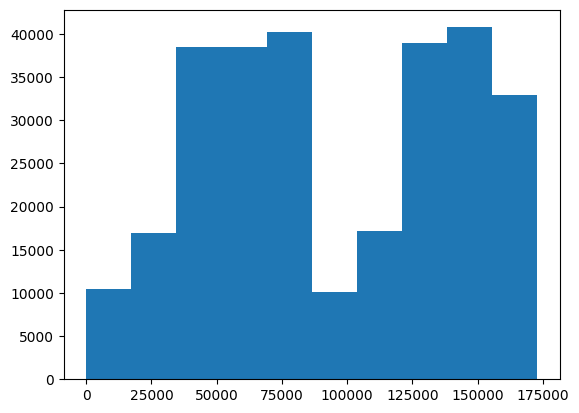

In [8]:
plt.hist(df['Time'])

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [42]:
# Because class 1 is fraud, the sum of 'Class' should give total number of fraud cases.
fraud_count = df['Class'].sum()
fraud_rate = fraud_count/len(df)
print(f'Total fraud count: {fraud_count}\tTotal rows: {len(df)}\tFraud rate: {fraud_rate}')

Total fraud count: 492	Total rows: 284807	Fraud rate: 0.001727485630620034


In [26]:
# Look at the range of the feature data to see if it should be transformed
pd.DataFrame(df.describe().loc['max',:] - df.describe().loc['min',:]).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,172792.0,58.86244,94.773457,57.708148,22.558515,148.544973,99.462131,164.146736,93.223927,29.029061,...,62.033221,21.436234,67.336147,7.421176,17.814986,6.121896,54.177877,49.277892,25691.16,1.0


### *Preparation*

* Split the data
* Grid or random search
* Print model evalutation metrics: 
    * recall
    * precision
    * F1
    * AUC score
* Plot:
    * confusion matrix
    * ROC
* Try different models
    * Logistic regression
    * Naïve Bayes
    * SVM (linear, rbf, poly)
    * Random forest
    * Gradient boost
    * XGBoost

In [36]:
X = df[df.columns[:-1]]
X.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


In [45]:
uniform(loc=0, scale=4)

In [31]:
# # Define a function
# def supervised(estimator, df, param_distributions, model_name='model'):
#     """
#     * Split the data
#     * Scale the data
#     * Perform the following for both raw and scaled data:
#         * Random search to find best parameters
#         * Print model evalutation metrics: 
#             * recall
#             * precision
#             * F1
#             * AUC score
#         * Plot:
#             * confusion matrix
#             * ROC
#     Params:
#     * df: Dataframe with all data and target variable as last column.
    
#     Returns:
#     * Best model from random search
#     """
#     X = df[df.columns[:-1]]
#     y = df[df.columns[-1]]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=0)

#     scaler = MinMaxScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     search = RandomizedSearchCV(estimator, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)
#     best_model = search.best_estimator_

#     y_pred = best_model.predict(X_test)
#     y_pred_train = best_model.predict(X_train)
#     MSE = mean_squared_error(y_test, y_pred)
#     r2_train = r2_score(y_train, y_pred_train)
#     r2 = r2_score(y_test, y_pred)
#     print(f'Model: {model_name}\tMeansquared error: {MSE}\tR^2 on test data: {r2}')
#     print(f'\tR^2 score from training data: {r2_train}\tDifference between training vs. test R^2 scores: {r2_train-r2}')
#     print(f'Best model parameters from grid search: {grid.best_params_}')
#     return best_model

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1fc52a05e50>,
 'penalty': ['l2', 'l1']}

In [51]:
# List parameters common for several methods
C_list = uniform(loc=0, scale=4)
max_iter_list = np.arange(100,500,100)
max_iter_list

array([100, 200, 300, 400])

In [65]:
# Define a class
class supervised:
    """
    * Split the data
    * Scale the data
    * Perform the following for both raw and scaled data:
        * Random search to find best parameters
        * Print model evalutation metrics: 
            * recall
            * precision
            * F1
            * AUC score
        * Plot:
            * confusion matrix
            * ROC
    Params:
    * df: Dataframe with all data and target variable as last column.
    
    Returns:
    * Best model from random search
    """
    def __init__(self, df, estimator, param_distributions, model_name):
        X = df[df.columns[:-1]]
        y = df[df.columns[-1]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=0)
        self.X_train = X_train
        self.X_test =  X_test
        self.y_train = y_train
        self.y_test =  y_test
        self.estimator = estimator
        self.params = param_distributions
        self.model_name = model_name

    def get_best_model(self,scaled=True):
        if scaled==True:
            scaler = MinMaxScaler()
            self.X_train = scaler.fit_transform(self.X_train)
            self.X_test = scaler.transform(self.X_test)
            print('**Data has been scaled.**')
        else:
            print('**Data not scaled**')
        search = RandomizedSearchCV(self.estimator, param_distributions=self.params, random_state=0,n_jobs=-1)
        search.fit(self.X_train, self.y_train)
        best_model = search.best_estimator_

        y_pred = best_model.predict(self.X_test)
        y_pred_train = best_model.predict(self.X_train)

        # test_set = (self.y_test, y_pred)
        # train_set = (self.y_train, y_pred_train)

        # Metrics for test data
        recall = recall_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        f1score = f1_score(self.y_test, y_pred)
        auc = roc_auc_score(self.y_test, y_pred)

        # Metrics for training data
        recall_train = recall_score(self.y_train, y_pred_train)
        precision_train = precision_score(self.y_train, y_pred_train)
        f1score_train = f1_score(self.y_train, y_pred_train)
        auc_train = roc_auc_score(self.y_train, y_pred_train)

        print(f'\n{self.model_name} evaluation metrics: \n\tTest data\t\tTraining data\t\tDifference')
        print(f'\tRecall: {100*recall:.2f}%\t\t{100*recall_train:.2f}%\t\t{100*recall-recall_train:.2f}%')
        print(f'\tPrecision: {100*precision:.2f}%\t{100*precision_train:.2f}%\t\t{100*precision-precision_train:.2f}%')
        print(f'\tF1: {100*f1score:.2f}%\t\t{100*f1score_train:.2f}%\t\t{100*f1score-f1score_train:.2f}%')
        print(f'\tAUC: {100*auc:.2f}%\t\t{100*auc_train:.2f}%\t\t{100*auc-auc_train:.2f}%')
        
        print(f'Best model parameters from grid search: {search.best_params_}')
        ConfusionMatrixDisplay.from_estimator(best_model, self.X_test, self.y_test)
        RocCurveDisplay.from_estimator(best_model, self.X_test, self.y_test)
        return best_model


### *Logistical regression*

**Data has been scaled.**
logistical regression evaluation metrics: 
	Test data		Training data		Difference
	Recall: 57.43%		57.54%		56.85%
	Precision: 87.88%	88.24%		87.00%
	F1: 69.46%		69.66%		68.76%
	AUC: 78.71%		78.77%		77.92%
Best model parameters from grid search: {'C': 3.3770629943240693, 'max_iter': 400}
logistical regression evaluation metrics: 
	Test data		Training data		Difference
	Recall: 57.43%		57.54%		56.85%
	Precision: 87.88%	88.24%		87.00%
	F1: 69.46%		69.66%		68.76%
	AUC: 78.71%		78.77%		77.92%
Best model parameters from grid search: {'C': 3.3770629943240693, 'max_iter': 400}


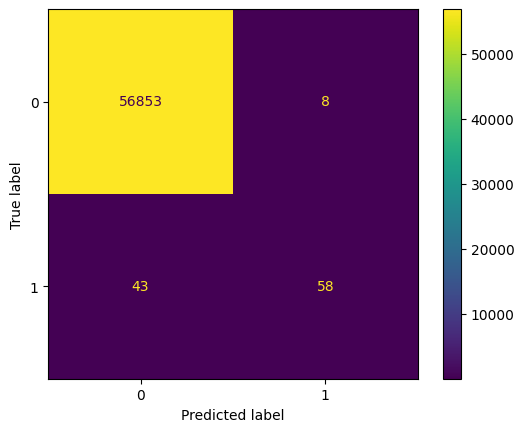

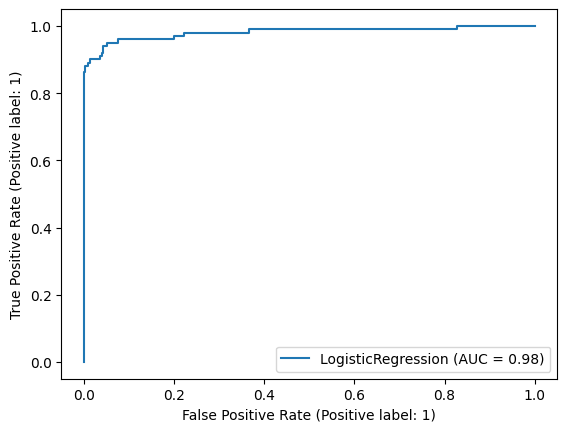

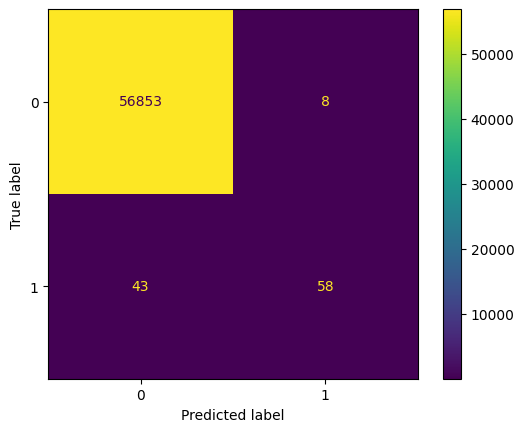

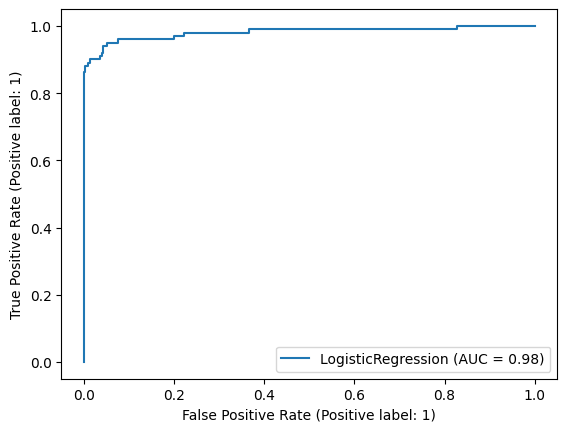

In [60]:

# Logistical regression
param_lr = {
    # 'penalty': ['l1','l2', 'elasticnet'],
    'C': C_list,
    'max_iter' : max_iter_list
}

lr = LogisticRegression(random_state=0)
lr_attributes = supervised(df, lr, param_lr, model_name='logistical regression')
best_lr = lr_attributes.get_best_model()
best_lr_scaled = lr_attributes.get_best_model(scaled=False)

### *Gaussian Naïve Bayes*

**Data has been scaled.**
Gaussian Naïve Bayes evaluation metrics: 
	Test data		Training data		Difference
	Recall: 85.15%		82.35%		84.32%
	Precision: 6.60%	6.00%		6.54%
	F1: 12.25%		11.19%		12.14%
	AUC: 91.50%		90.07%		90.60%
Best model parameters from grid search: {'var_smoothing': 9.636627605010293e-06}
Gaussian Naïve Bayes evaluation metrics: 
	Test data		Training data		Difference
	Recall: 85.15%		82.35%		84.32%
	Precision: 6.60%	6.00%		6.54%
	F1: 12.25%		11.19%		12.14%
	AUC: 91.50%		90.07%		90.60%
Best model parameters from grid search: {'var_smoothing': 9.636627605010293e-06}


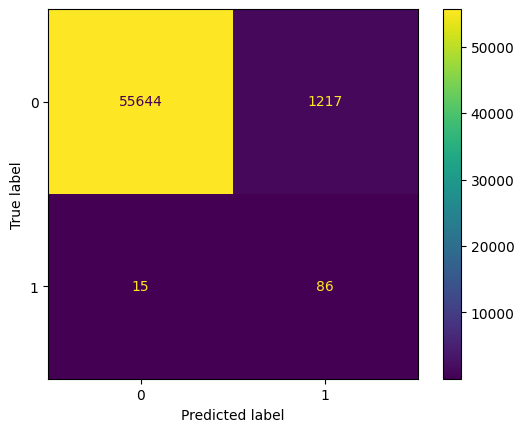

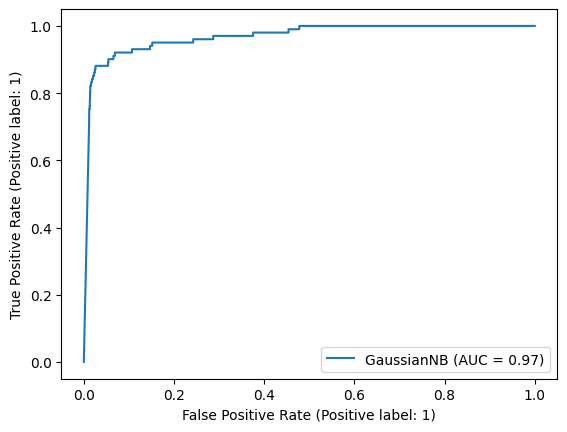

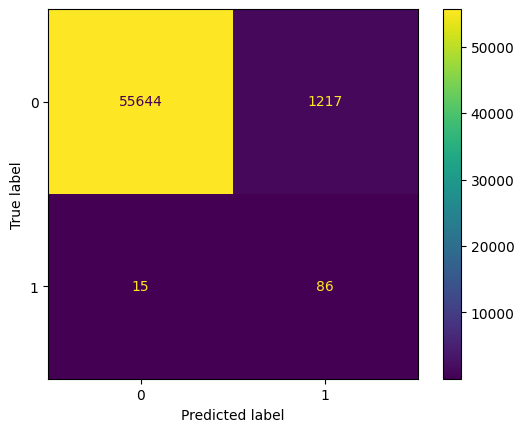

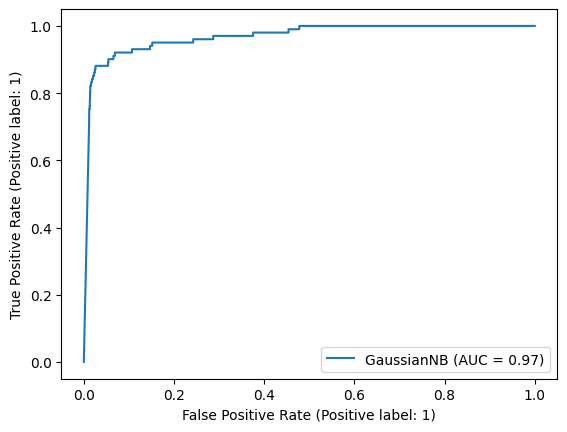

In [64]:
# Naïve Bayes
param_nb = {
    'var_smoothing': uniform(loc=0, scale=1e-05)
}

nb = GaussianNB()
nb_attributes = supervised(df, nb, param_nb, model_name='Gaussian Naïve Bayes')
best_nb = nb_attributes.get_best_model()
best_nb_scaled = nb_attributes.get_best_model(scaled=False)

In [62]:
uniform(loc=0, scale=1e-05)

Class:
* data

function: 
* scaled vs. unscaled

Questions:
* How to use `.predict_proba()` to set custom thresholds